PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [ ]:
from google.colab import files
import pandas as pd

def load_data():
    # Upload file từ máy tính lên Google Colab
    uploaded = files.upload()

    # Lấy tên file đã upload
    filename = list(uploaded.keys())[0]

    # Đọc dữ liệu vào DataFrame
    df = pd.read_csv(filename)

    # Hiển thị 10 dòng đầu tiên
    print(df.head(10))

    return df

# Gọi hàm để tải và hiển thị dữ liệu
titanic_df = load_data()


Saving titanic_disaster.csv to titanic_disaster (1).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6       

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


Số lượng dữ liệu thiếu trong các cột:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


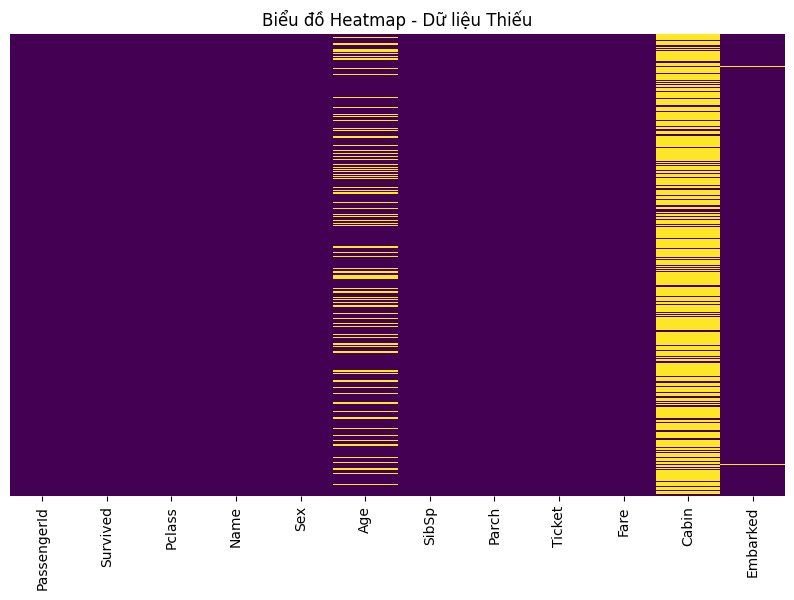

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thống kê dữ liệu thiếu
missing_data = titanic_df.isnull().sum()
print("Số lượng dữ liệu thiếu trong các cột:\n", missing_data)

# Trực quan hóa dữ liệu thiếu bằng Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Biểu đồ Heatmap - Dữ liệu Thiếu")
plt.show()


3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [ ]:
# Tách cột 'Name' thành 'firstName' và 'secondName'
titanic_df[['firstName', 'secondName']] = titanic_df['Name'].str.split(',', expand=True)

# Xóa cột 'Name' sau khi tách
titanic_df.drop(columns=['Name'], inplace=True)

# Kiểm tra kết quả
print(titanic_df[['firstName', 'secondName']].head(10))


   firstName                                   secondName
0     Braund                              Mr. Owen Harris
1    Cumings   Mrs. John Bradley (Florence Briggs Thayer)
2  Heikkinen                                  Miss. Laina
3   Futrelle           Mrs. Jacques Heath (Lily May Peel)
4      Allen                            Mr. William Henry
5      Moran                                    Mr. James
6   McCarthy                                Mr. Timothy J
7    Palsson                        Master. Gosta Leonard
8    Johnson     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9     Nasser                  Mrs. Nicholas (Adele Achem)


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [ ]:
# Thay thế 'male' thành 'M' và 'female' thành 'F'
titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 'M', 'female': 'F'})

# Kiểm tra kết quả
print(titanic_df[['Sex']].head(10))


  Sex
0   M
1   F
2   F
3   F
4   M
5   M
6   M
7   M
8   F
9   F
